In [4]:
!pip install yfinance

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [5]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta



In [7]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-08-28,132.080002,133.240005,130.850006,131.789993,131.789993,16715500
247,2023-08-29,132.998001,137.294998,132.979996,135.490005,135.490005,30803300
248,2023-08-30,135.570007,137.250000,135.020996,136.929993,136.929993,21773400
249,2023-08-31,137.050003,138.399994,136.820007,137.350006,137.350006,28147900
250,2023-09-01,138.429993,138.580002,135.940002,136.800003,136.800003,16665700


In [8]:
data = data[["Date", "Close"]]

In [9]:
data.head(3)

,Date,Close
0,2022-09-02,108.680000
1,2022-09-06,107.480003
2,2022-09-07,110.480003


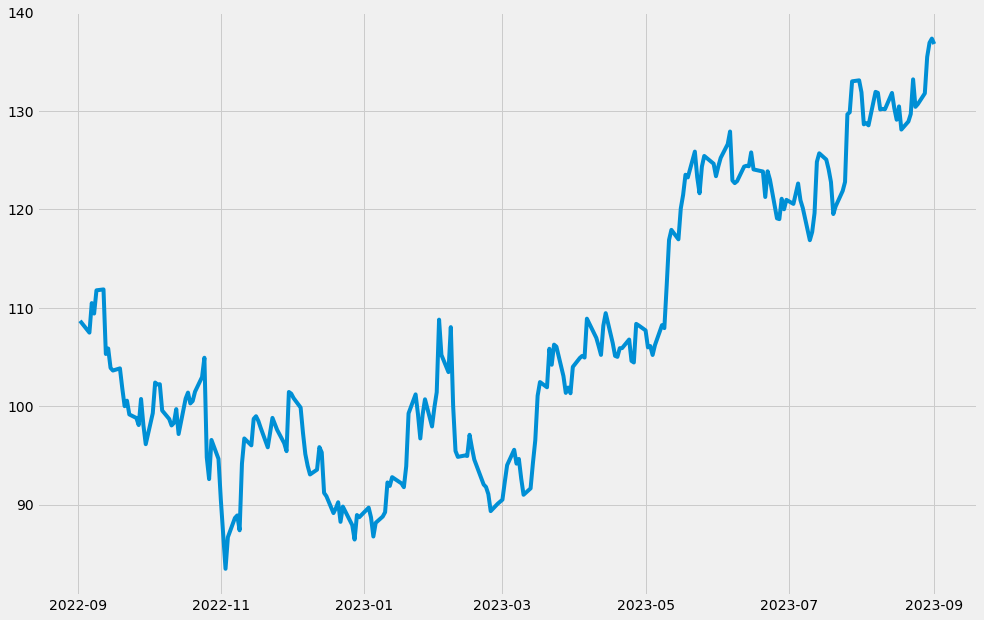

In [10]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [15]:
result = seasonal_decompose(data["Close"],model='multiplicative', freq = 12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [19]:
decompose_result = seasonal_decompose(data.dropna(), freq=12) 
df_trend = decompose_result.trend 
df_season = decompose_result.seasonal 
df_residual = decompose_result.resid

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

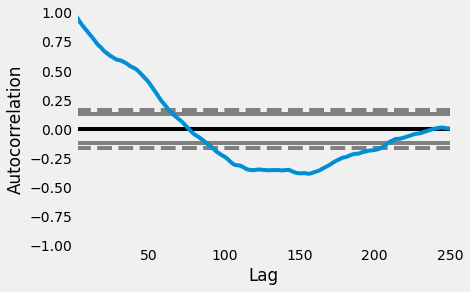

In [20]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\Fatma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


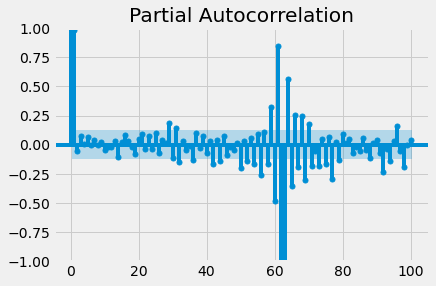

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100);

In [25]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima_model import ARIMA


In [26]:
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
fitted.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [27]:
predictions = fitted.predict()
print(predictions)

NameError: name 'fitted' is not defined

In [28]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\Fatma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Fatma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Fatma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.810
Date:                            Sat, 02 Sep 2023   AIC                           1127.620
Time:                                    17:40:47   BIC                           1179.704
Sample:                                         0   HQIC                          1148.610
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3260      3.548      0.092      0.927      -6.628       7.280
ar.L2          0.0933      1.471   

In [29]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    137.186311
252    137.198492
253    136.913476
254    137.270175
255    137.887567
256    138.992064
257    138.480849
258    138.684648
259    138.718196
260    139.227871
261    139.912626
Name: predicted_mean, dtype: float64


<AxesSubplot:>

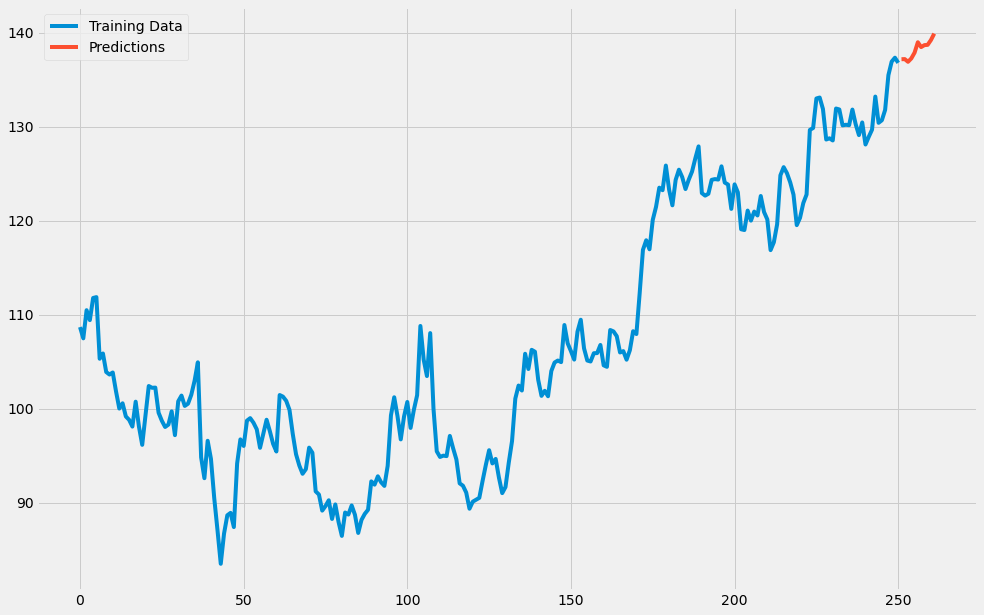

In [30]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")